# 0. bike

### 데이터셋 출처
* https://www.kaggle.com/competitions/bike-sharing-demand

### 데이터 구성
datetime - hourly date + timestamp  

season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 

holiday - whether the day is considered a holiday

workingday - whether the day is neither a weekend nor holiday

weather
- 1: Clear, Few clouds, Partly cloudy, Partly cloudy

- 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist

- 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

- 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
temp - temperature in Celsius

atemp - "feels like" temperature in Celsius
humidity - relative humidity

windspeed - wind speed

casual - number of non-registered user rentals initiated

registered - number of registered user rentals initiated

count - number of total rentals

## 필요한 라이브러리 로드

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터셋 로드
* season 은 계절로 1,2,3,4로 ordinal encoding(순서가 있는 값)으로 인코딩이 되어 있다.
* weather 는 1이면 맑은 날, 2는 흐린날, 3은 눈,비 오는 날, 4는 폭우, 폭설, 우박 내리는 날
* temp - 섭씨 기온
* atemp - 체감온도

In [3]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
import os
train = pd.read_csv("/gdrive/My Drive/Colab Notebooks/data/bike/train.csv")
test = pd.read_csv("/gdrive/My Drive/Colab Notebooks/data/bike/test.csv")

In [5]:
print(train.shape)
train.head(2)

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40


In [6]:
print(test.shape)
test.head(2)

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000


In [7]:
set(train.columns) - set(test.columns)

{'casual', 'count', 'registered'}

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [9]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [10]:
train.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [11]:
test.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
dtype: int64

In [12]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


#1. 파생변수 만들기

In [13]:
train["datetime"] = pd.to_datetime(train["datetime"])
train["year"] = train["datetime"].dt.year
train["month"] = train["datetime"].dt.month
train["day"] = train["datetime"].dt.day
train["hour"] = train["datetime"].dt.hour
train["minute"] = train["datetime"].dt.minute
train["second"] = train["datetime"].dt.second

train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,0,0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,0,0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,0,0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,1,1,3,0,0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,1,1,4,0,0


In [14]:
test["datetime"] = pd.to_datetime(test["datetime"])
test["year"] = test["datetime"].dt.year
test["month"] = test["datetime"].dt.month
test["day"] = test["datetime"].dt.day
test["hour"] = test["datetime"].dt.hour
test["minute"] = test["datetime"].dt.minute
test["second"] = test["datetime"].dt.second

test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,1,20,0,0,0
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,1,0,0
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,20,2,0,0
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,3,0,0
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,1,20,4,0,0


#2. EDA

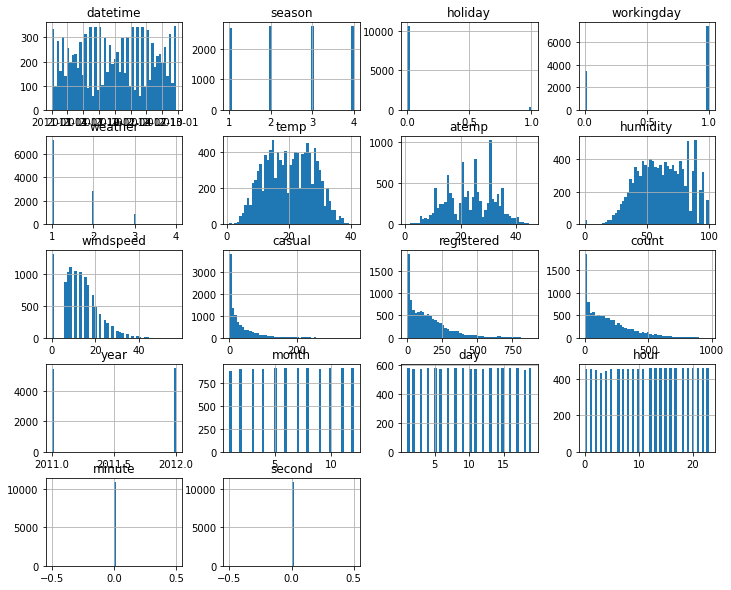

In [15]:
train.hist(figsize=(12, 10), bins=50);

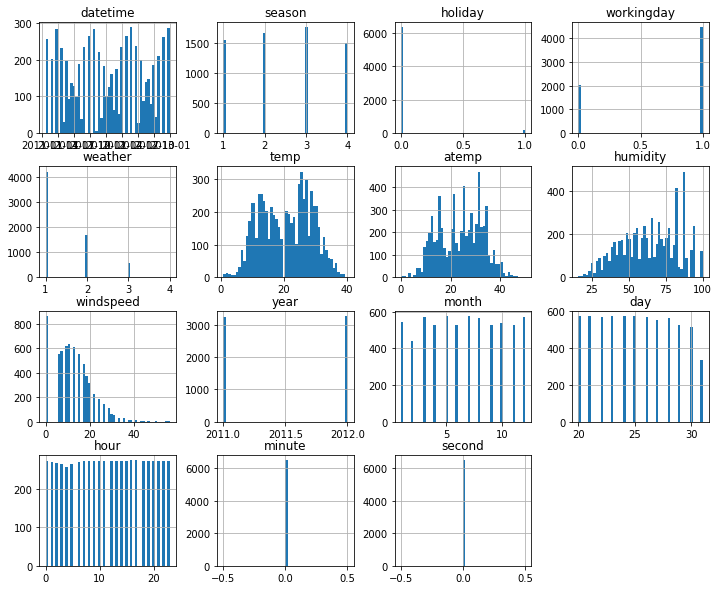

In [16]:
test.hist(figsize=(12, 10), bins=50);

In [17]:
train[train["windspeed"] == 0].shape

(1313, 18)

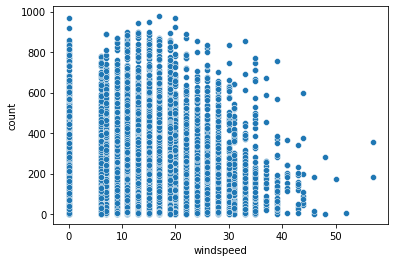

In [18]:
sns.scatterplot(data=train, x="windspeed", y="count")

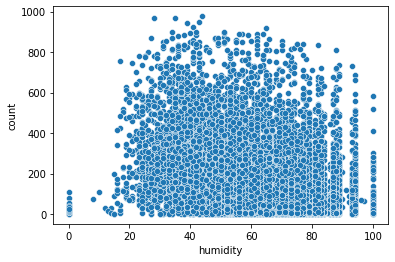

In [19]:
sns.scatterplot(data=train, x="humidity", y="count")

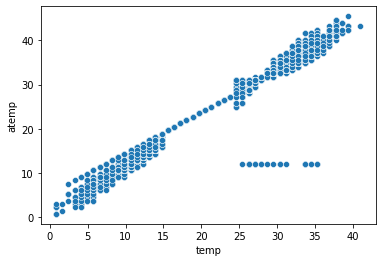

In [20]:
sns.scatterplot(data=train, x="temp", y="atemp")

In [21]:
train[(train["temp"] > 20) & (train["temp"] < 40) & (train["atemp"] < 15)]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
8991,2012-08-17 00:00:00,3,0,1,1,27.88,12.12,57,11.0014,21,67,88,2012,8,17,0,0,0
8992,2012-08-17 01:00:00,3,0,1,1,27.06,12.12,65,7.0015,16,38,54,2012,8,17,1,0,0
8993,2012-08-17 02:00:00,3,0,1,1,27.06,12.12,61,8.9981,4,15,19,2012,8,17,2,0,0
8994,2012-08-17 03:00:00,3,0,1,1,26.24,12.12,65,7.0015,0,6,6,2012,8,17,3,0,0
8995,2012-08-17 04:00:00,3,0,1,1,26.24,12.12,73,11.0014,0,9,9,2012,8,17,4,0,0
8996,2012-08-17 05:00:00,3,0,1,1,26.24,12.12,73,7.0015,2,34,36,2012,8,17,5,0,0
8997,2012-08-17 06:00:00,3,0,1,1,25.42,12.12,78,8.9981,6,151,157,2012,8,17,6,0,0
8998,2012-08-17 07:00:00,3,0,1,1,26.24,12.12,73,7.0015,11,368,379,2012,8,17,7,0,0
8999,2012-08-17 08:00:00,3,0,1,1,27.88,12.12,65,8.9981,43,625,668,2012,8,17,8,0,0
9000,2012-08-17 09:00:00,3,0,1,1,28.70,12.12,58,7.0015,58,320,378,2012,8,17,9,0,0


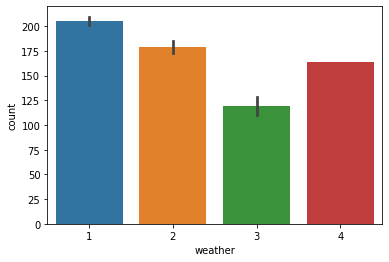

In [22]:
# 날씨에 따른 평균 자전거 대여수 
sns.barplot(data=train, x="weather", y="count")

In [23]:
# 4폭우와 폭설이 내리는 날이나 시간(4)은 많지 않기 때문에 여기에서도 데이터가 하나 뿐이라서 count 값이 많게 나왔습니다.
train[train["weather"] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second
5631,2012-01-09 18:00:00,1,0,1,4,8.2,11.365,86,6.0032,6,158,164,2012,1,9,18,0,0


In [24]:
test[test["weather"] == 4]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
154,2011-01-26 16:00:00,1,0,1,4,9.02,9.85,93,22.0028,2011,1,26,16,0,0
3248,2012-01-21 01:00:00,1,0,0,4,5.74,6.82,86,12.9980,2012,1,21,1,0,0


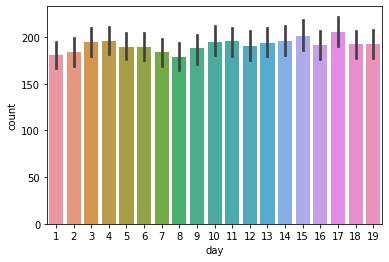

In [25]:
# day 는 train과 test 를 나누는 기준입니다. : train은  19일까지만 있고 test 는 20일 이후 데이터가 있습니다.
# 1~19일까지 학습한 것을 바탕으로 20일 이후의 데이터를 예측하면 예측이 도움이 되지 않을 수 있습니다.
# day는 피처에서 제거하는게 나아보입니다.
sns.barplot(data=train, x="day", y="count")

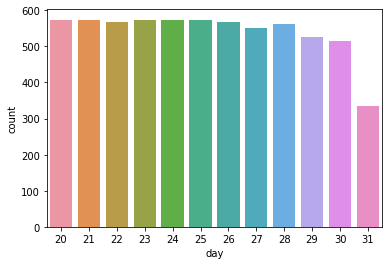

In [26]:
sns.countplot(data=test, x="day")

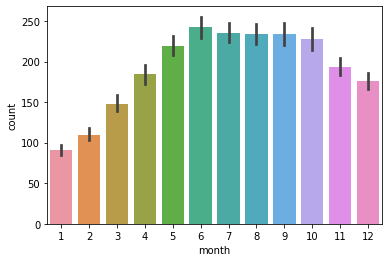

In [27]:
# 월별로 차이가 있어보이고 날씨가 추운 겨울에는 대여량이 적고 5~10월에는 대여량이 많은 것을 알 수 있습니다.
sns.barplot(data=train, x="month", y="count")

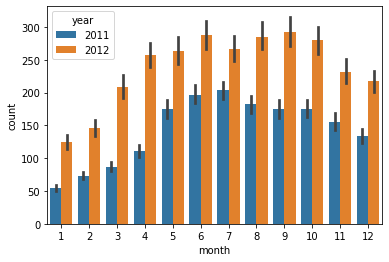

In [28]:
# 2011년과 2012년을 보면 2배까지 차이가 나는 달이 있기도 합니다.
# 위 그래프에서는 월을 넣어주는게 더 나아보기는 했지만 연도라는게 2배까지도 차이가 나기 때문에  모델이 예측하는데 도움이 되지 않을 수도 있습니다.
sns.barplot(data=train, x="month", y="count", hue="year")

In [29]:
train.groupby("season")["month"].describe()

,count,mean,std,min,25%,50%,75%,max
season,,,,,,,,
1,2686.0,2.006329,0.815331,1.0,1.0,2.0,3.0,3.0
2,2733.0,5.001098,0.816421,4.0,4.0,5.0,6.0,6.0
3,2733.0,7.998902,0.816421,7.0,7.0,8.0,9.0,9.0
4,2734.0,11.000366,0.816721,10.0,10.0,11.0,12.0,12.0


In [30]:
train.groupby("season")["month"].unique()

season
1       [1, 2, 3]
2       [4, 5, 6]
3       [7, 8, 9]
4    [10, 11, 12]
Name: month, dtype: object

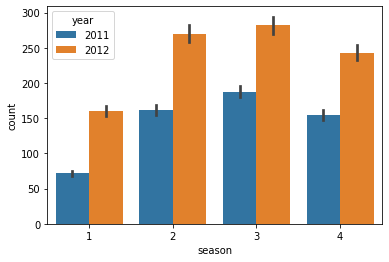

In [31]:
# season은 1 = spring, 2 = summer, 3 = fall, 4 = winter 이라고는 하지만
# 실제로 월을 보면 분기가 들어있습니다.
sns.barplot(data=train, x="season", y="count", hue="year")

In [32]:
train["year-month"] = train["datetime"].astype(str).str[:7]
test["year-month"] = test["datetime"].astype(str).str[:7]

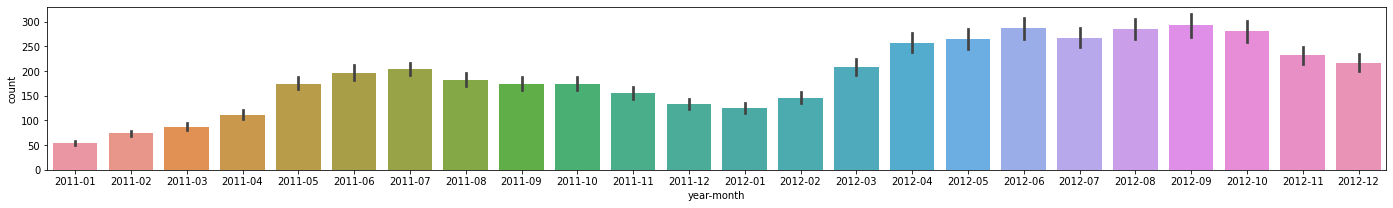

In [33]:
plt.figure(figsize=(24, 3))
sns.barplot(data=train, x="year-month", y="count")

In [34]:
# one-hot-encoding => pd.get_dummies(), 순서가 없는 데이터에 인코딩
# ordinal-encoding => category 데이터타입으로 변경하면 ordinal encoding을 할 수 있습니다. 순서가 있는 데이터에 인코딩
train["year-month-code"] = train["year-month"].astype("category").cat.codes
test["year-month-code"] = test["year-month"].astype("category").cat.codes

# 3. Decison Tree

- 교차검증

In [35]:
# label_name : 정답값
label_name = "count"
label_name

'count'

In [36]:
train.columns.tolist()

['datetime',
 'season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'casual',
 'registered',
 'count',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'second',
 'year-month',
 'year-month-code']

In [37]:
feature_names = train.columns.tolist()
# 신호와 소음을 구분해서 어떤 피처가 도움이 될지를 찾아내는데, 
# EDA, 도메인지식을 활용하여 자전거 대여수에 영향을 줄만한 피처를 찾습니다.
feature_names = ['holiday', 'workingday', 'weather', 
                 'temp', 'atemp', 'humidity', 'windspeed', 
                 'year', 'hour']
print(feature_names)

['holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'hour']


In [38]:
X_train = train[feature_names]
X_train.head(2)

(10886, 9)


,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour
0,0,0,1,9.84,14.395,81,0.0,2011,0
1,0,0,1,9.02,13.635,80,0.0,2011,1


In [39]:
X_test = test[feature_names]
X_test.head(2)

(6493, 9)


,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour
0,0,1,1,10.66,11.365,56,26.0027,2011,0
1,0,1,1,10.66,13.635,56,0.0000,2011,1


In [40]:
y_train = train[label_name]
y_train.head(2)

(10886,)


0    16
1    40
Name: count, dtype: int64

In [41]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(random_state=42, n_jobs=-1)
model

RandomForestRegressor(n_jobs=-1, random_state=42)

## 교차검증

In [42]:
model

RandomForestRegressor(n_jobs=-1, random_state=42)

In [47]:
from sklearn.model_selection import cross_val_predict

y_valid_pred = cross_val_predict(model, X_train, y_train, cv=5, n_jobs=-1, verbose=2)
y_valid_pred

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   15.4s finished


array([ 99.62      ,  88.89      ,  46.623     , ..., 164.37      ,
       124.84633333,  62.07      ])

In [48]:
train["count"].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

# 4. RMSLE(Root Mean Squared Logarithmic Error)

In [49]:
from sklearn.metrics import mean_squared_log_error

mean_squared_log_error(y_train, y_valid_pred) ** 0.5

0.5516900565715624

In [50]:
np.sqrt(np.square(np.log(y_train + 1) - np.log(y_valid_pred + 1)).mean())

0.5516900565715624

In [51]:
rmlse = (((np.log1p(y_train) - np.log1p(y_valid_pred)) ** 2).mean()) ** 0.5
rmlse

0.5516900565715624

# 5. GridSearchCV or RandomizedSearchCV

In [52]:
import sklearn
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

In [53]:
np.random.randint(3, 10, 10)

array([5, 4, 9, 9, 8, 5, 9, 3, 3, 6])

In [54]:
np.random.uniform(0, 1, 10)

array([0.18354501, 0.17591543, 0.69626974, 0.22679996, 0.31364052,
       0.17793501, 0.10150047, 0.26827542, 0.2195948 , 0.88577698])

In [55]:
from sklearn.model_selection import RandomizedSearchCV

param_distributions = {"max_depth": np.random.randint(15, 30, 10), 
                       "max_features": np.random.uniform(0.8, 1, 10)}

reg = RandomizedSearchCV(model, 
                         param_distributions=param_distributions, 
                         scoring="neg_root_mean_squared_error",
                         n_iter=10, cv=5, n_jobs=-1,
                         verbose=2, random_state=42)
reg.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_jobs=-1,
                   param_distributions={'max_depth': array([19, 21, 29, 28, 29, 22, 15, 29, 17, 27]),
                                        'max_features': array([0.91197316, 0.89286866, 0.95335947, 0.9226419 , 0.87847287,
       0.92488147, 0.92841051, 0.9277121 , 0.83321316, 0.90478802])},
                   random_state=42, scoring='neg_root_mean_squared_error',
                   verbose=2)

In [56]:
reg.best_estimator_

RandomForestRegressor(max_depth=17, max_features=0.9226419000284881, n_jobs=-1,
                      random_state=42)

In [57]:
# neg_root_mean_squared_error 로 되어 있어서 스코어가 음수로 나옵니다.
rmsle = abs(reg.best_score_)
rmsle

78.25946491476378

In [58]:
best_model = reg.best_estimator_
best_model

RandomForestRegressor(max_depth=17, max_features=0.9226419000284881, n_jobs=-1,
                      random_state=42)

In [61]:
y_predict = best_model.fit(X_train, y_train).predict(X_test)

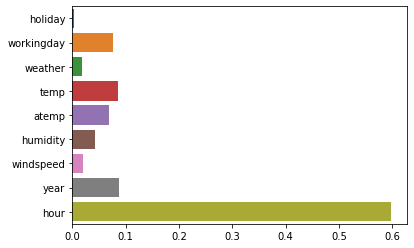

In [62]:
sns.barplot(x=best_model.feature_importances_, y=model.feature_names_in_)